
# Project: Investigate No-show appointments of 81 neighbourhoods in Brazil 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project I'll be investigating No-show appointments dataset hosted on Kaggle. [https://www.kaggle.com/joniarroba/noshowappointments.]

> In this project I will be analysing data associated with no show appointments collected from 10,000 medical appointments in Brazil and is focused on investigating following questions. 

> **After scheduled an appointment with a doctor did most people attend the appointment or did not turn up.**

> **Which sex group did not attend to a medical appointment after scheduling a one.**

> **What are the neighbourhood that has most number of patients who missed a doctors appointments.**
 
> **What is the most significant variable in the dataset to determine if a patient will show up for their scheduled appointment?**

Following data is contained in the collected data.


Gender -> Gender of the patient.

ScheduledDay -> what day the patient set up their appointment.

AppointmentDay -> what day petient call in to scheduled an appointment.

Age -> Age of the patient.

Neighbourhood -> location of the hospital.

Scholarship -> whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

Hipertension -> 0 if the Hipertension is not present in the patient and 1 if its present.

Diabetes -> 0 if Diabetes is not present in the patient and 1 if its present 

Alcoholism -> 0 if the Alcoholism is not present in the patient and 1 if its present.

Handcap -> 0 - 4 (Not enough detials in to find out what are the five different categories)

SMS_received -> 0 if the sms is not received and 1 if its recevied.

No-show -> 'No' if patient showed up to their appointment, and 'Yes' if they did not show up.



> **List of site referred during the report.**

***** https://stackoverflow.com/

***** https://www.kaggle.com



In [68]:
# Import statements 

import matplotlib.pyplot as plt
% matplotlib inline
import pandas as pd
import numpy as np
from matplotlib.ticker import StrMethodFormatter

<a id='wrangling'></a>
## Data Wrangling


In [69]:
# Load the data 

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [70]:
# Obtain number of rows and columns
df.shape

(110527, 14)

In [71]:
# There are 110527 data rows in this dataset and 14 columns

In [72]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [73]:
df.rename(columns=lambda x: x.strip().lower().replace("-","_"),inplace =True)

In [74]:
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [75]:
# Need to correct the format of the data in the Scheduled Day and Appointment Day columns for more readable format.

In [76]:
def apply_datetime_transformation (column_name):
  return column_name.apply(np.datetime64)

In [77]:
df.scheduledday = apply_datetime_transformation(df.scheduledday)

In [78]:
df.appointmentday = apply_datetime_transformation(df.appointmentday)

In [79]:
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [80]:
# What are the datatypes of the columns in the dataset.

In [81]:
df.dtypes

patientid                float64
appointmentid              int64
gender                    object
scheduledday      datetime64[ns]
appointmentday    datetime64[ns]
age                        int64
neighbourhood             object
scholarship                int64
hipertension               int64
diabetes                   int64
alcoholism                 int64
handcap                    int64
sms_received               int64
no_show                   object
dtype: object

In [82]:
# Check the distribution of data in the dataset.

In [83]:
# Removing appointmentday, scheduledday, patientid and appointmentid

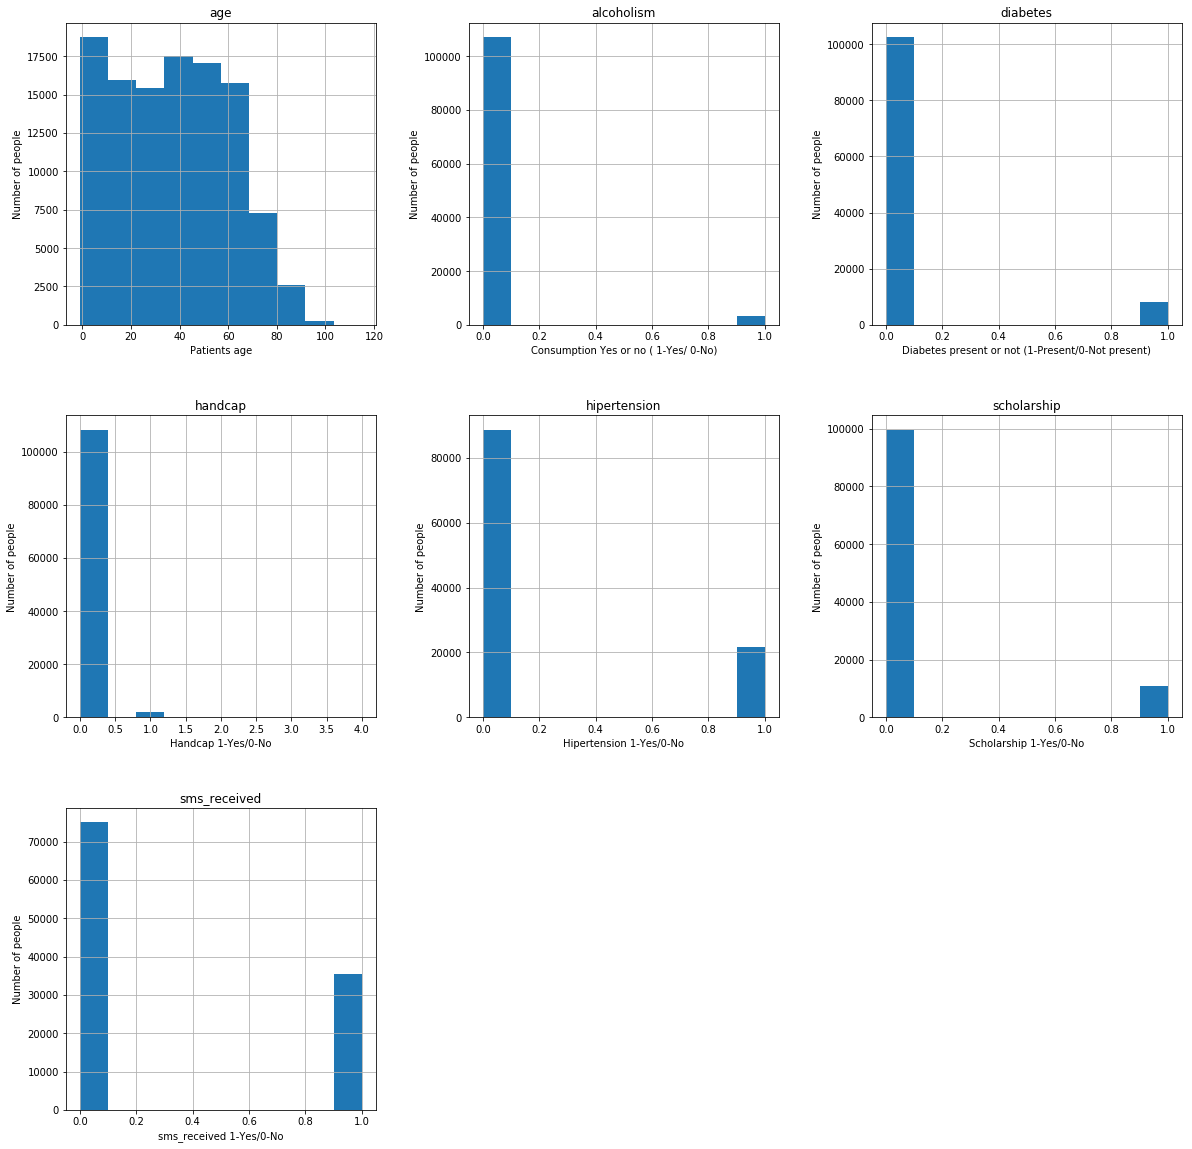

In [84]:
axarr = df.drop(['patientid', 'appointmentid','scheduledday', 'appointmentday'], axis=1).hist(figsize=(20,20))
list1 = ['Patients age', 'Consumption Yes or no ( 1-Yes/ 0-No)', 'Diabetes present or not (1-Present/0-Not present)', 'Handcap 1-Yes/0-No','Hipertension 1-Yes/0-No','Scholarship 1-Yes/0-No','sms_received 1-Yes/0-No','',''];

index = 0 
for ax in axarr.flatten():  
    ax.set_xlabel(list1[index])
    ax.set_ylabel("Number of people")
    index += 1


## Data Cleaning 



After observing the dataset I found that there are some data records that does not make sense, and as it’s difficult to find the correct information for those patient Ids rather than correcting the data record I’m removing them from the dataset.


 >Remove minus 1 age
 
 >Remove waittime rows where scheduledday is after appointmentday

In [85]:
# create a new column using appointmentday and scheduledday

In [86]:
df['waittime'] = (df.appointmentday - df.scheduledday).dt.days

In [87]:
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,waittime
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-1
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,-1
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-1
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-1


In [88]:
# waittime -1 -> today 
# waittime 0 -> following day
# waittime 1 -> 1 day after following day
# waittime 2 -> 2 days after following day

In [89]:
df['waittime'].describe()

count    110527.000000
mean          9.183702
std          15.254996
min          -7.000000
25%          -1.000000
50%           3.000000
75%          14.000000
max         178.000000
Name: waittime, dtype: float64

In [90]:
# maximum wait time is 178 days, average wait time is 9 days.

In [91]:
# As -1 days means today all the records which are less then -1 is not valid and needed to be corrected or removed.
# As it's difficult to find the correct values for the patient id’s I'm going to remove them


In [92]:
df_min_count = df.query('waittime<-1').count()['patientid']

In [93]:
df_min_count

5

In [94]:
# There are 5 rows where appointmentday is before the scheduledday
# Need to remove those 5 rows.

In [95]:
df_min = df.query('waittime<-1')

In [96]:
df_min

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,waittime
27033,7.839273e+12,5679978,M,2016-05-10 10:51:53,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-2
55226,7.896294e+12,5715660,F,2016-05-18 14:50:41,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-2
64175,2.425226e+13,5664962,F,2016-05-05 13:43:58,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-2
71533,9.982316e+14,5686628,F,2016-05-11 13:49:20,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-7
72362,3.787482e+12,5655637,M,2016-05-04 06:50:57,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-2


In [97]:
df.drop(df_min.index,inplace=True)

In [98]:
# confirm the data records have been deleted.

In [99]:
df_min_confirm_delete = df.query('waittime<-1').count()['patientid']

In [100]:
df_min_confirm_delete

0

In [101]:
 sum(df.duplicated())

0

In [102]:
# above answer is 0 that mean there are no duplicate data in this data set.

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110522 entries, 0 to 110526
Data columns (total 15 columns):
patientid         110522 non-null float64
appointmentid     110522 non-null int64
gender            110522 non-null object
scheduledday      110522 non-null datetime64[ns]
appointmentday    110522 non-null datetime64[ns]
age               110522 non-null int64
neighbourhood     110522 non-null object
scholarship       110522 non-null int64
hipertension      110522 non-null int64
diabetes          110522 non-null int64
alcoholism        110522 non-null int64
handcap           110522 non-null int64
sms_received      110522 non-null int64
no_show           110522 non-null object
waittime          110522 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(9), object(3)
memory usage: 13.5+ MB


In [104]:
# There are no null values in the data set all columns have 110522 data points.

In [105]:
df.describe()

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,waittime
count,1.105220e+05,1.105220e+05,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000
mean,1.474935e+14,5.675305e+06,37.089041,0.098270,0.197255,0.071868,0.030401,0.022231,0.321040,9.184253
std,2.560866e+14,7.129722e+04,23.110064,0.297681,0.397928,0.258270,0.171689,0.161493,0.466878,15.255115
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,4.172536e+12,5.640284e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
50%,3.173700e+13,5.680574e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,9.439277e+13,5.725525e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,178.000000


In [106]:
# maximum age is 115 and there is a -1 min for the age need to investigate that

In [107]:
df_min = df[df['age']==-1]

In [108]:
df_min

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,waittime
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No,-1


In [109]:
# record number 99832 is having the -1 patent age record. Decided to remove that record as
# it's difficult to find the correct value for the patient.

In [110]:
df.drop(df_min.index, inplace = True)

In [111]:
df_min = df[df['age']==-1]

In [112]:
df_min

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,waittime


In [113]:
df.describe()

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,waittime
count,1.105210e+05,1.105210e+05,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000
mean,1.474906e+14,5.675304e+06,37.089386,0.098271,0.197257,0.071869,0.030401,0.022231,0.321043,9.184345
std,2.560860e+14,7.129691e+04,23.109885,0.297682,0.397929,0.258272,0.171690,0.161494,0.466879,15.255153
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,4.172457e+12,5.640284e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
50%,3.173185e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,9.438963e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,178.000000


In [114]:
# Minimum age of the patient is 0 now.

In [115]:
# explore handcap data

In [116]:
df.handcap.value_counts()

0    108282
1      2040
2       183
3        13
4         3
Name: handcap, dtype: int64

In [117]:
# There are 05 different categories of handcap values, it’s difficult to say 
# without more information what is the severity of the handicap patient based on handcap value. 

In [118]:
# Transform the values in no_show column.  Yes -> 1 and No -> 0
# No_show ->1 -> did not attend the appointment.
# No_show -> 0 -> attend the appointment. 


In [119]:
df

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,waittime
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-1
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,-1
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-1
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-1
5,9.598513e+13,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,1
6,7.336882e+14,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,1
7,3.449833e+12,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,1
8,5.639473e+13,5638447,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No,-1
9,7.812456e+13,5629123,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No,1


In [120]:
df['no_show'] = df['no_show'].replace({'Yes':1,'No':0})

In [121]:
df.to_csv('investigate_a_dataset_05_Dec_2018_clean.csv', index =False)

In [122]:
df

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,waittime
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,-1
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,-1
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,-1
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,-1
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,-1
5,9.598513e+13,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,0,1
6,7.336882e+14,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,1,1
7,3.449833e+12,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,1,1
8,5.639473e+13,5638447,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,0,-1
9,7.812456e+13,5629123,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,0,1


<a id='eda'></a>
## Exploratory Data Analysis


> no_show is the dependent variable and scholarship, hipertension, diabetes, alcoholism, handcap, sms_received are the independent variables

### Research Question 1 

#### After scheduled an appointment with a doctor did most people attend the appointment or did not turn up.

In [123]:
no_show_no=df.no_show==0

In [124]:
df.age[no_show_no].mean()

37.790504154999034

In [125]:
no_show_yes=df.no_show==1

In [126]:
df.age[no_show_yes].median()

33.0

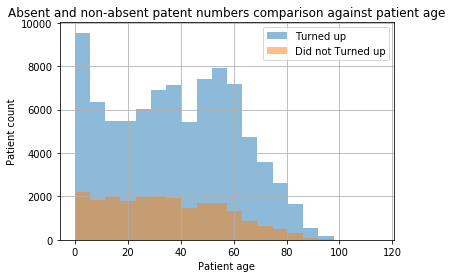

In [127]:
df.age[no_show_no].hist(alpha=0.5,bins =20,  label ='Turned up')
df.age[no_show_yes].hist(alpha=0.5, bins = 20, label ='Did not Turned up')
plt.ylabel("Patient count")
plt.xlabel("Patient age")
plt.title("Absent and non-absent patent numbers comparison against patient age")
plt.legend();



#### After scheduling an appointment more people will turn up for the appointment. 

### Research Question 2

#### Which sex group did not attend to a medical appointment most after scheduling a one.

In [128]:
gender_noshow = df.groupby('gender').sum()['no_show']

In [129]:
gender_noshow

gender
F    14591
M     7723
Name: no_show, dtype: int64

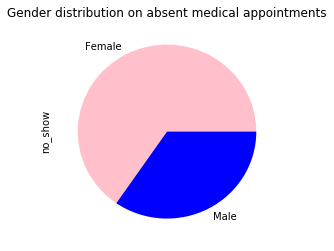

In [130]:
sex=['Female','Male']
colors = ['pink','b']
gender_noshow.plot.pie(figsize=(4,4),title = 'Gender distribution on absent medical appointments', labels =sex, colors=colors)


#### Women group did not attend the medical appointment most after scheduling a one

### Research Question 3
#### What are the neighbourhood that has most number of patients who missed a doctors appointments.

In [131]:
neighbourhood = df.groupby('neighbourhood').sum()['no_show']

In [132]:
neighbourhood.sort_values (ascending=True)

neighbourhood
PARQUE INDUSTRIAL                 0
AEROPORTO                         1
ILHA DO FRADE                     2
ILHAS OCEÂNICAS DE TRINDADE       2
ILHA DO BOI                       3
PONTAL DE CAMBURI                12
MORADA DE CAMBURI                16
SEGURANÇA DO LAR                 28
NAZARETH                         29
UNIVERSITÁRIO                    32
SANTA HELENA                     37
HORTO                            42
DE LOURDES                       47
FRADINHOS                        48
ANTÔNIO HONÓRIO                  50
ENSEADA DO SUÁ                   52
MÁRIO CYPRESTE                   54
COMDUSA                          56
BOA VISTA                        58
ARIOVALDO FAVALESSA              62
SOLON BORGES                     69
SANTA LUÍZA                      77
SANTA LÚCIA                      86
PIEDADE                          88
DO CABRAL                        88
BARRO VERMELHO                   91
DO MOSCOSO                       92
ESTRELINHA    

Text(0,0.5,'Number of absent patients on medical appointments.')

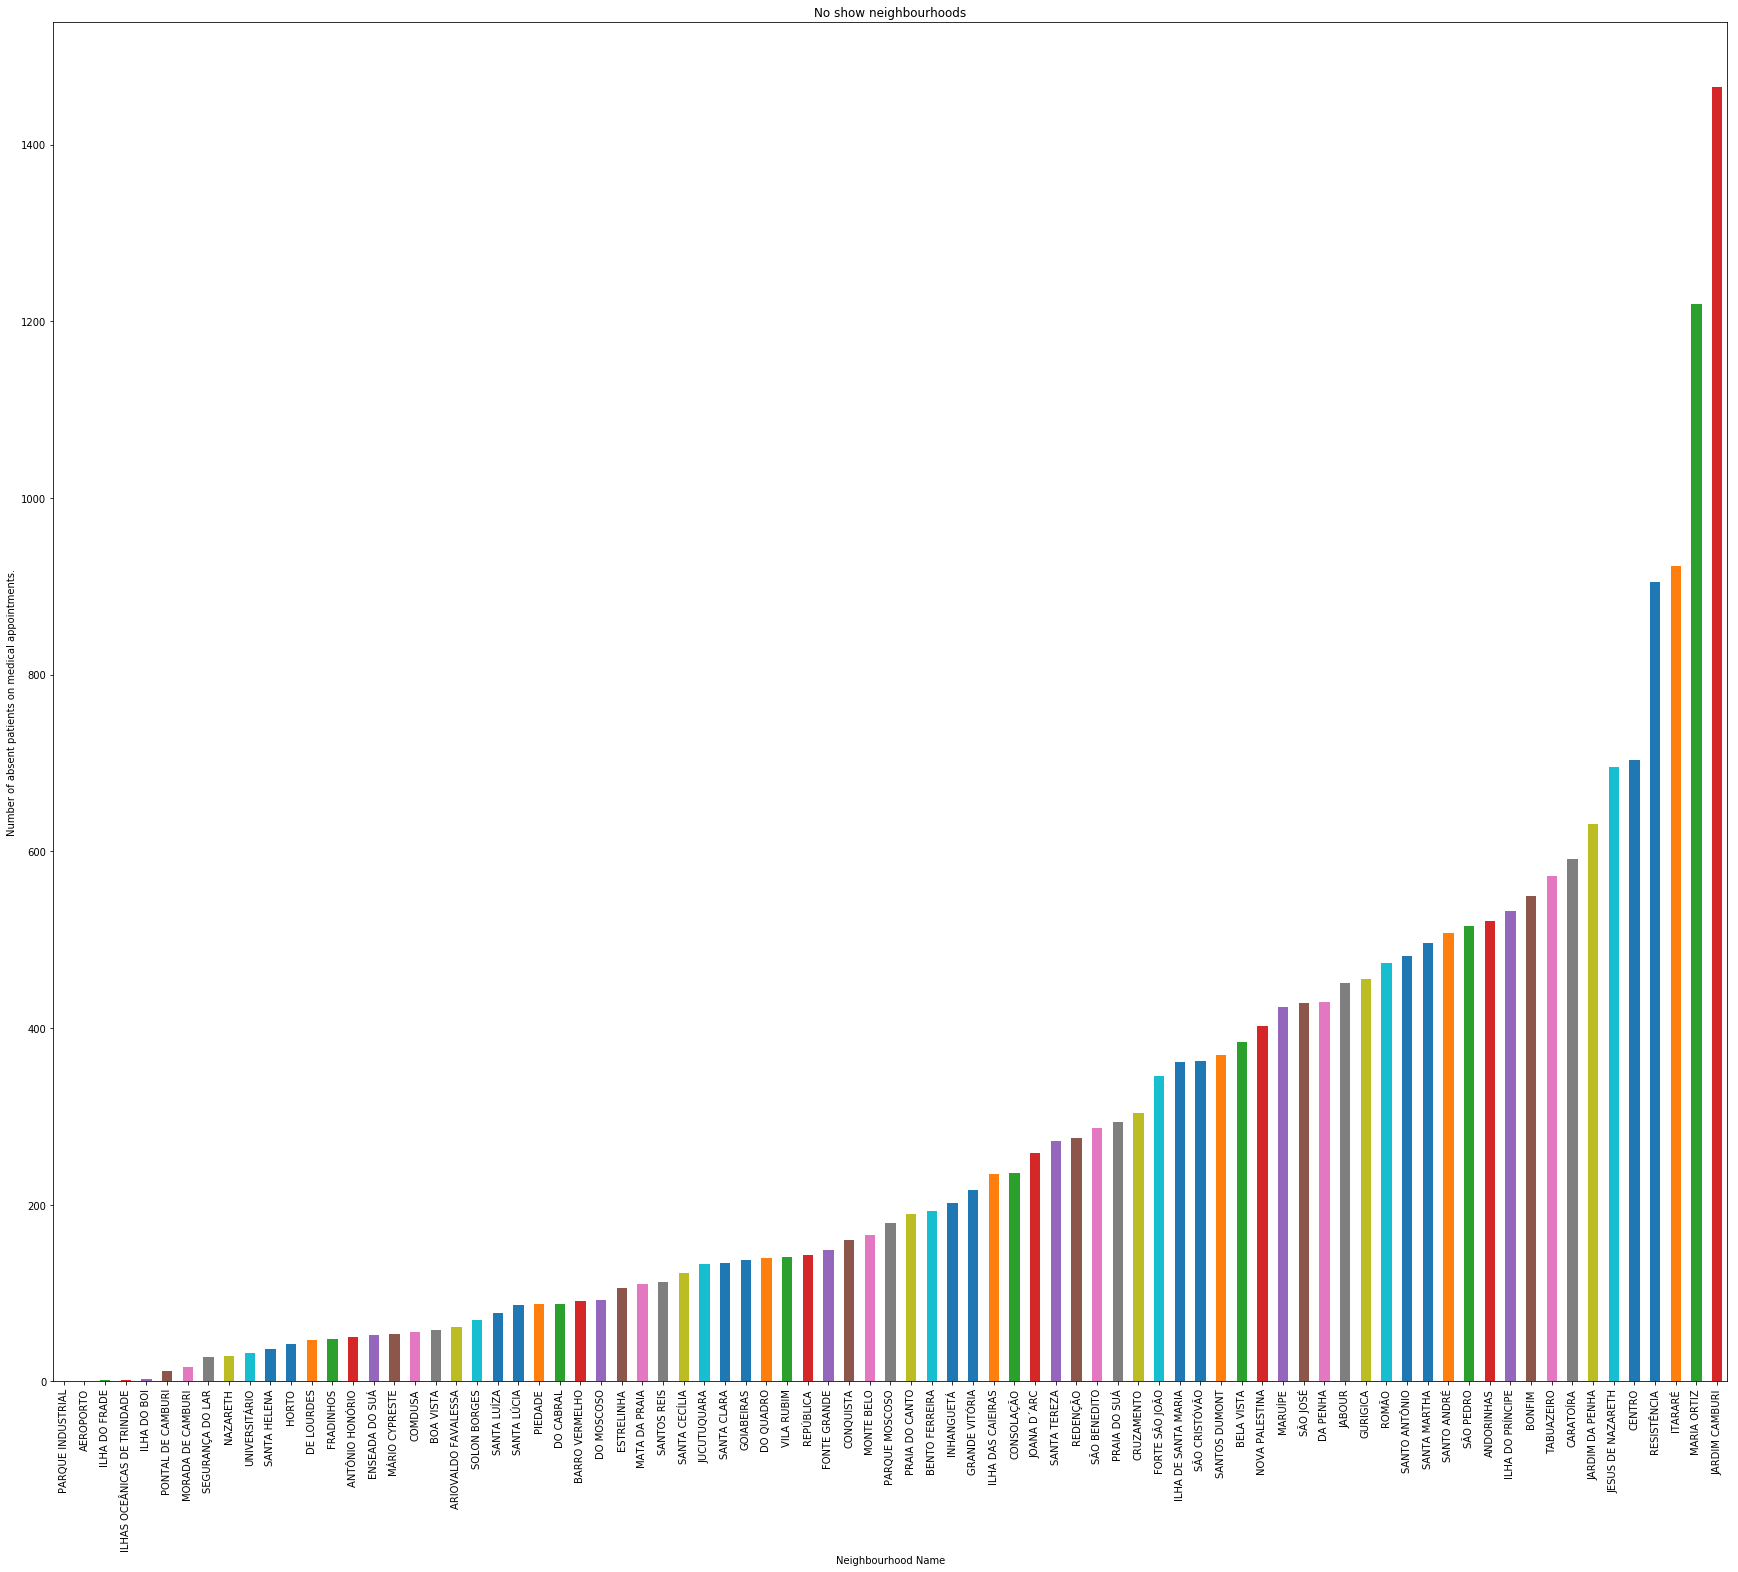

In [133]:
ax = neighbourhood.sort_values (ascending=True).plot(kind='bar',figsize=(30,25), title = 'No show neighbourhoods')
ax.set_xlabel("Neighbourhood Name")
ax.set_ylabel("Number of absent patients on medical appointments.")

#### Suburb of JARDIM CAMBURI in Brazil has the greatest number of patents who did not turn up for a medical appointment.

### Research Question 4
#### What is the most significant variable in the dataset to determine if a patient will show up for their scheduled appointment?

In [134]:
# Find the patient who did not attend the appointment group by following attributes
# scholarship, hypertension , diabetes , alcoholism ,handcap ,sms_received 


In [135]:
no_show_group = df.groupby('no_show')['scholarship','hipertension','diabetes','alcoholism','handcap','sms_received'].sum()

In [136]:
not_attend = no_show_group.query("no_show == 1")

In [137]:
not_attend

,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
no_show,,,,,,
1,2578,3772,1430,677,451,9784


In [138]:
df['no_show'].value_counts()

0    88207
1    22314
Name: no_show, dtype: int64

In [139]:
not_attend_all = df['no_show'].value_counts()[1]

In [140]:
not_attend_all

22314

In [141]:
not_attend_graph = (not_attend/not_attend_all)*100

In [142]:
not_attend_graph

,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
no_show,,,,,,
1,11.553285,16.904186,6.408533,3.03397,2.021153,43.846912


Text(0,0.5,'percentage of change')

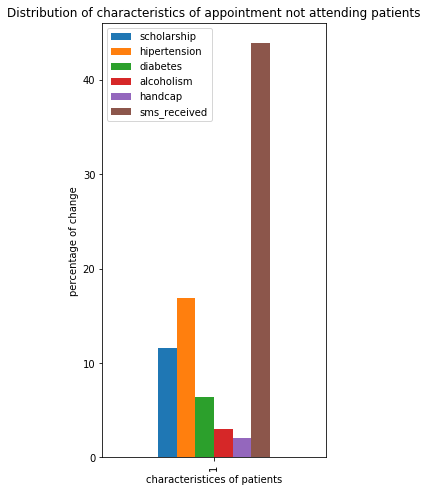

In [143]:
ax = not_attend_graph.plot(kind='bar', figsize = (4,8), title ='Distribution of characteristics of appointment not attending patients')
ax.set_xlabel("characteristices of patients")
ax.set_ylabel("percentage of change")

#### Among the patients who did not attend the medical appointment more than 40% did not have the sms received. Next most significant attribute of the patient is they have hypertension.


In [144]:
attend = no_show_group.query("no_show == 0")

In [145]:
attend

,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
no_show,,,,,,
0,8283,18029,6513,2683,2006,25698


In [146]:
attend_all = df['no_show'].value_counts()[0]

In [147]:
attend_all

88207

In [148]:
attend_graph = (attend/attend_all)*100

In [149]:
attend_graph

,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
no_show,,,,,,
0,9.390411,20.439421,7.383768,3.041709,2.274196,29.133742


Text(0,0.5,'percentage of change')

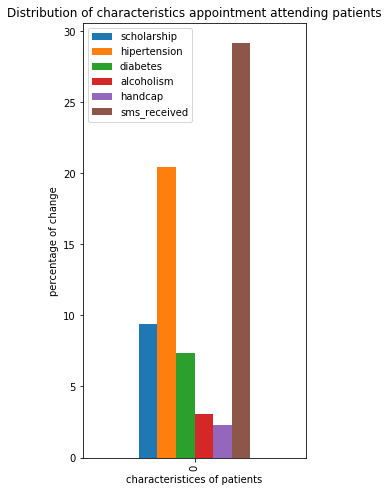

In [150]:
ax = attend_graph.plot(kind='bar', figsize = (4,8), title ='Distribution of characteristics appointment attending patients')
ax.set_xlabel("characteristices of patients")
ax.set_ylabel("percentage of change")

#### Among the patients who attend the medical appointment close to 29% received the sms. 

<a id='conclusions'></a>
## Conclusions

> It’s difficult to say people could not attend to medical appointment because they have not received the sms notification because close to 70% people who attend the medical appointment did not received the sms notification. 
But when comparing the given list and given characteristics of the people most people who did not attend the medical appointment have not received the sms. 

**Limitations**
> In the Kaggle no show appointment dataset there are no null values, or duplicate values so it’s a pretty clean data set, however some of the variables need more explanation in order it to be use effectively in the data analysis process, for example handcap has 5 possible values but as it has not been defined what those value mean, so it can not be use for any predication or analysis process.

> And other limitation that I’m seeing in the dataset is unlike ‘scholarship’
‘sms_received’ and ‘no_show’ variables which can be represented with two values, hypertension, diabetes and alcoholism can be represented with value range for example person who consume couple of drinks per year can be given a value of 1 and person who drink every day can be given a value of 10 so better and more variety of insightful analysis can be done.

